In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import import_ipynb
from Lib_Midterm_Test import *
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

importing Jupyter notebook from Lib_Midterm_Test.ipynb


In [2]:
dirpath = 'Test/bbc_test/'
topics = ['business','entertainment','politics','sport','tech']

df_test = []
for topic in topics:
    df_topic = read_all_txt_files(dirpath, topic)
    df_test.append(df_topic)
df_test = pd.concat(df_test, ignore_index=True)

In [3]:
df_test.head()

,content,topic
0,Aids and climate top Davos agenda\n\nClimate c...,0
1,Lacroix label bought by US firm\n\nLuxury good...,0
2,Saudi investor picks up the Savoy\n\nLondon's ...,0
3,Wall Street cool to eBay's profit\n\nShares in...,0
4,Parmalat founder offers apology\n\nThe founder...,0


In [4]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 287 entries, 0 to 286
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   content  287 non-null    object
 1   topic    287 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 4.6+ KB


In [5]:
df_test.shape

(287, 2)

### ---Test với full tập Test

In [6]:
X_test = df_test['content']
y_test = df_test['topic']

In [7]:
import pickle
### Load model bbc_model.pkl
with open('bbc_model_DamThiMinhPhuong_K269.pkl', 'rb') as file: 
    bbc_model = pickle.load(file)

In [8]:
y_pred = bbc_model.predict(X_test)

Vao lenh Transform


In [9]:
accuracy, recall, precision, f1 = static_score_model_class(y_test, y_pred, aver='micro')  #số lượng sample sport=0 => dữ liệu không cân bằng
accuracy, recall, precision, f1

(0.9790940766550522,
 0.9790940766550522,
 0.9790940766550522,
 0.9790940766550522)

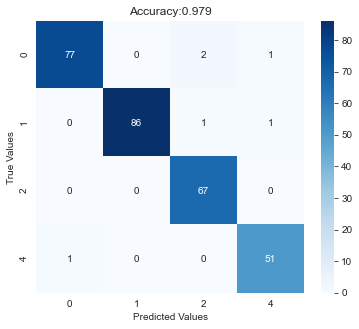

In [10]:
cm = confusion_matrix(y_test, y_pred)
cm_df = pd.DataFrame(cm, index=[0,1,2,4], columns=[0,1,2,4])
plt.figure(figsize=(6,5))
sns.heatmap(cm_df, annot=True,fmt='g',cmap='Blues')
plt.title('Accuracy:{0:.3f}'.format(accuracy_score(y_test,y_pred)))
plt.ylabel('True Values')
plt.xlabel('Predicted Values')
plt.show()

In [11]:
target_names = ['business','entertainment','politics','tech']
print(classification_report(y_test, y_pred, target_names = target_names))

               precision    recall  f1-score   support

     business       0.99      0.96      0.97        80
entertainment       1.00      0.98      0.99        88
     politics       0.96      1.00      0.98        67
         tech       0.96      0.98      0.97        52

     accuracy                           0.98       287
    macro avg       0.98      0.98      0.98       287
 weighted avg       0.98      0.98      0.98       287



### ---Test với 1 phần của tập Tech

In [12]:
df_test_tech = read_all_txt_files(dirpath, 'tech')
df_test_tech.head()

,content,topic
0,Cabs collect mountain of mobiles\n\nGadgets ar...,4
1,Digital UK driven by net and TV\n\nThe UK's ad...,4
2,Confusion over high-definition TV\n\nNow that ...,4
3,Commodore finds new lease of life\n\nThe once-...,4
4,Mobile multimedia slow to catch on\n\nThere is...,4


In [13]:
X_tech = df_test_tech['content']
y_tech = df_test_tech['topic']

In [14]:
y_pred_tech = bbc_model.predict(X_tech[10:40])

Vao lenh Transform


In [15]:
y_pred_tech

array([4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4])

In [16]:
accuracy, recall, precision, f1 = static_score_model_class(y_tech[10:40], y_pred_tech, aver='micro')
accuracy, recall, precision, f1

(1.0, 1.0, 1.0, 1.0)

### Kết Luận
- Mô hình có kết quả tốt trên cả train (100%) và test (97,9%), chênh lệch train và test nhỏ
- Precision, Recall, F1_score rất cao ~0,98 => model có thể predict các lớp rất tốt 
- => Mô hình Logistic Regression phù hợp 

# THANK YOU!